<a href="https://colab.research.google.com/github/BernardoHalfeld/lia1-2023-1-Pessoal-/blob/main/GettingStarted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activity 2: Getting Started (fast.ai)**

Student: [Bernardo Halfeld](https://github.com/BernardoHalfeld) - 202004705

###  1) ------ *Is it a bird?* ------

#### **Fastbook library installation**

In [ ]:
pip install fastbook

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from fastbook import*

#### **Download images of birds ans non-birds (forest)**

In [ ]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls), urls[0]

(1,
 'https://www.almanac.com/sites/default/files/image_nodes/bluebird-3456115_1920.jpg')

In [ ]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

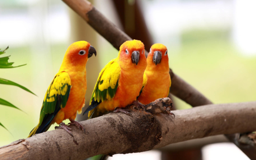

In [ ]:
im = Image.open(dest)
im.to_thumb(256,256)

In [ ]:
urls = search_images_ddg('forest photos', max_images=1)
len(urls), urls[0]

(1,
 'https://wallup.net/wp-content/uploads/2015/12/219723-nature-trees-forest-branch-sun_rays-landscape-pine_trees-sunlight-green.jpg')

In [ ]:
dest = Path('forest.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

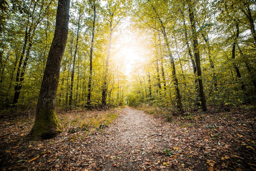

In [ ]:
im = Image.open(dest)
im.to_thumb(256,256)

In [ ]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

if not path.exists():
    path.mkdir()
    
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)

#### **Training the model**

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);

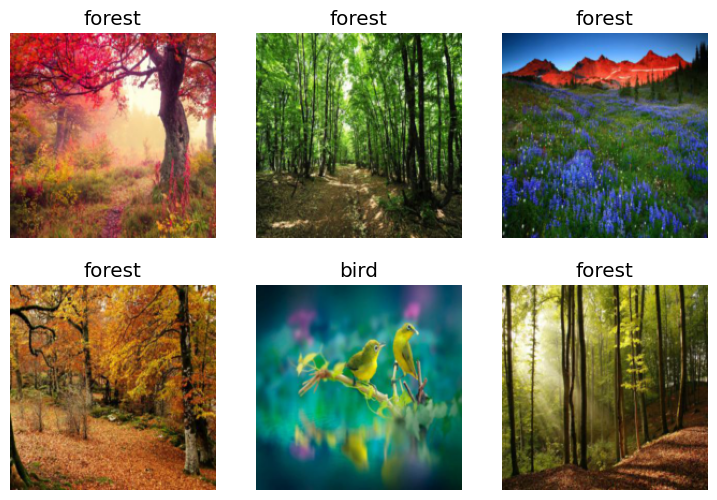

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.294235,0.000046,0.000000,00:56


epoch,train_loss,valid_loss,error_rate,time
0,0.008069,0.016917,0.005376,01:16
1,0.005265,0.000029,0.000000,01:19
2,0.003710,0.000208,0.000000,01:16


#### **Testing the model to "bird.jpg" and "forest.jpg", downloaded at the start of the code**

In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('forest.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: forest.
Probability it's a bird: 0.0000


### 2) ------ *Segmentation* ------

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

C:\Users\nebia\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\nebia/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|█████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:04<00:00, 20.5MB/s]


epoch,train_loss,valid_loss,time
0,2.811011,2.667720,00:16


epoch,train_loss,valid_loss,time
0,2.230538,1.852099,00:19
1,1.868347,1.425735,00:19
2,1.634325,1.345577,00:18
3,1.458928,1.013040,00:18
4,1.321038,0.915073,00:18
5,1.197390,0.861751,00:20
6,1.088404,0.808054,00:19
7,1.001723,0.795141,00:19


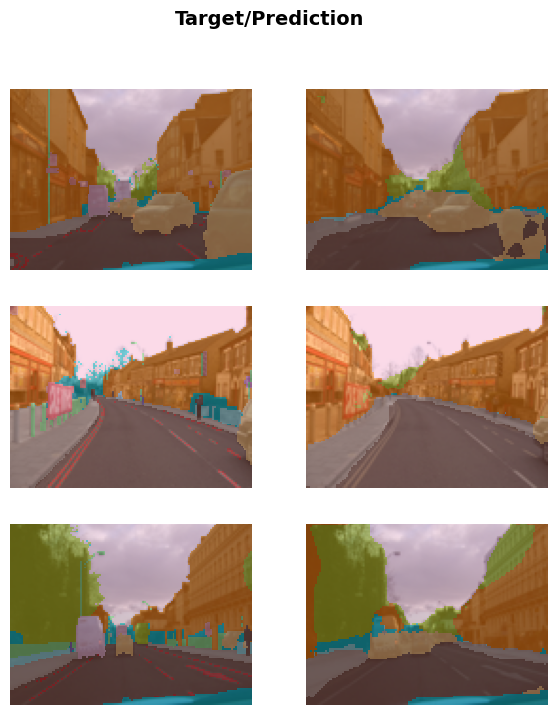

In [ ]:
learn.show_results(max_n=3, figsize=(7,8))

### 3) ------ *Tabular analysis /income prediction* ------

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

In [ ]:
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Local-gov,Some-college,Never-married,Protective-serv,Other-relative,White,False,22.000000,195531.999848,10.0,<50k
1,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,False,33.000000,191384.999915,13.0,<50k
2,Private,7th-8th,Married-civ-spouse,Machine-op-inspct,Wife,Other,False,47.000000,103020.000400,4.0,<50k
3,Self-emp-not-inc,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,False,42.000000,238188.000476,9.0,<50k
4,Private,Some-college,Married-spouse-absent,Adm-clerical,Not-in-family,White,False,52.000000,218550.001411,10.0,>=50k
5,Self-emp-not-inc,Some-college,Never-married,Craft-repair,Own-child,White,False,40.000000,165815.000332,10.0,<50k
6,Private,1st-4th,Never-married,Handlers-cleaners,Not-in-family,White,False,31.000000,248652.999275,2.0,<50k
7,Private,Bachelors,Married-civ-spouse,Tech-support,Husband,White,False,45.000000,275994.997272,13.0,>=50k
8,State-gov,Some-college,Never-married,Prof-specialty,Own-child,White,False,20.000000,243986.002229,10.0,<50k
9,Private,HS-grad,Never-married,Exec-managerial,Not-in-family,White,False,23.000001,320293.995233,9.0,<50k


In [ ]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.372341,0.368513,0.832310,00:04
1,0.355164,0.360277,0.830927,00:04


### 4) ------ *collaborative filtering - recommendation system* ------

In [ ]:
from fastai.collab import*
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')

In [ ]:
dls.show_batch()

,userId,movieId,rating
0,605,587,3.0
1,452,780,4.0
2,430,539,2.0
3,299,592,4.0
4,452,1923,3.0
5,346,260,5.0
6,423,1097,3.5
7,306,1210,4.0
8,544,1240,4.5
9,294,39,4.0


In [ ]:
learn = collab_learner(dls, y_range=(0.5, 5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.516658,1.434386,00:00


epoch,train_loss,valid_loss,time
0,1.361568,1.376410,00:00
1,1.264634,1.203035,00:00
2,1.030925,0.904237,00:00
3,0.814036,0.756642,00:00
4,0.692789,0.718271,00:00
5,0.636861,0.704253,00:00
6,0.613095,0.698143,00:00
7,0.605075,0.696585,00:00
8,0.600052,0.695358,00:00
9,0.594405,0.695221,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,66.0,55.0,5.0,4.519696
1,11.0,22.0,4.0,3.401010
2,15.0,38.0,4.0,4.354965
3,17.0,78.0,4.0,3.249570
4,28.0,80.0,2.5,3.136662
5,98.0,68.0,4.5,4.075378
6,66.0,72.0,4.0,3.254244
7,42.0,26.0,4.5,3.681634
8,59.0,41.0,4.0,4.546864
